In [4]:
import pandas as pd
from collections import Counter
import numpy as np
import math
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
%matplotlib inline
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wchen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df = pd.read_csv('/Users/wchen\OneDrive - Analog Devices, Inc/Justin AARD/mental_health_subreddits_dataset.csv')

In [9]:
df.dropna(axis = 0, how = 'any')

,Unnamed: 0,subreddit.name,created_utc,body,sentiment
0,963,covid19_support,1635203992,This. Plus remember the poster in here a few w...,-0.6652
1,967,anxiety,1635203988,Currently 8 and a half months pregnant and als...,-0.8555
2,1142,anxiety,1635203613,Few people had COVID in my building and refuse...,-0.2960
3,1403,covid19_support,1635202948,My friend will be so relieved she didn't actua...,0.7626
4,1616,depression,1635202459,This hits close to home. \n\nHe sounds similar...,-0.4006
...,...,...,...,...,...
45879,17777050,anxiety,1581473713,"It is quite interesting, in terms of somewhat ...",-0.9256
45880,17777094,anxiety,1581466598,Stay focused on what the experts are saying an...,0.7430
45881,17777113,anxiety,1581463547,"No new COVID-19 cases in B.C., 4 confirmed pat...",-0.1531
45882,17777197,mentalhealth,1581454025,"Hi mate, as someone with GAD I can relate to y...",0.5332


In [78]:
sample = df.sample(45000)
sample.head()

,Unnamed: 0,subreddit.name,created_utc,body,sentiment
42492,16727347,anxiety,1586748338,wish guidance us work pharmacy grocery store t...,-0.3071
44002,17200328,anxiety,1585350224,discover asmr girlfriend long time ago blessin...,-0.8822
28828,13019463,anxiety,1598812181,post removed flagged see mentioned covid pleas...,0.7635
35115,14774428,anxiety,1593648201,post removed flagged see mentioned covid pleas...,0.7635
17929,9204635,anxiety,1609621787,issues never thought death much year could get...,0.3412


In [82]:
count = Counter()
for index, row in sample.iterrows():
    if row['subreddit.name'] == 'anxiety':
        count['anxiety'] += 1
    if row['subreddit.name'] == 'depression':
        count['depression'] += 1
    if row['subreddit.name'] == 'suicidewatch':
        count['SuicideWatch'] += 1
    if row['subreddit.name'] == 'mentalhealth':
        count['mentalhealth'] += 1
    if row['subreddit.name'] == 'covid19_support':
        count['COVID19_support'] += 1
count

Counter({'anxiety': 16385,
         'depression': 5752,
         'mentalhealth': 3242,
         'SuicideWatch': 3962,
         'COVID19_support': 15659})

In [84]:
def pre_cleaning(text):
    line=re.sub(r"\Bu/\w+", "USERNAME", text) #replace username with USERNAME
    line = demoji.replace(line, repl=' ')
    return line

In [85]:
#removing stopwords and urls, stemming, making lowercase 
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def cleaning(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [86]:
def post_cleaning(text):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ',text)

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    
    #remove digits
    processed_feature = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", processed_feature)

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    return processed_feature

In [87]:
#above functions combined
def preprocessing(text):
    line = pre_cleaning(text)
    line = cleaning(line)
    line = post_cleaning (line)
    return line

In [88]:
for sentiment in sample['sentiment']:
    if sentiment > 0:
        sample['sentiment'].replace({sentiment : 'positive'}, inplace=True)
    if sentiment < 0:
        sample['sentiment'].replace({sentiment : 'negative'}, inplace=True)
    else:
        sample['sentiment'].replace({sentiment : 'neutral'}, inplace=True)

TypeError: '>' not supported between instances of 'str' and 'int'

In [19]:
df.body = df.body.apply(lambda x: preprocessing(x))

Text(0.5, 1.0, 'Sentiment Data Distribution')

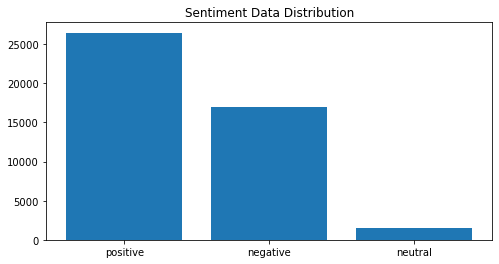

In [81]:
#Graphing
val_count = sample.sentiment.value_counts()
plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [23]:
from sklearn.model_selection import train_test_split

In [89]:
 # Splits Dataset into Training and Testing set
train_size = 0.8
train_data, test_data = train_test_split(sample, test_size=1-train_size, random_state=42, shuffle=True)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 36000
Test Data size 9000


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
vectorizer = TfidfVectorizer(max_features=14000,
                             min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
vectorizer.fit(train_data.body.to_list())
x_train = vectorizer.transform(train_data.body.to_list())
x_test = vectorizer.transform(test_data.body.to_list())

In [27]:
from sklearn.preprocessing import LabelEncoder

In [91]:
encoder = LabelEncoder() #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (36000, 1)
y_test shape: (9000, 1)


In [94]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics

In [96]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(x_train, y_train.ravel())
t1 = time.time()
prediction_linear = classifier_linear.predict(x_test)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

labels = [0.0, 1.0, 2.0]
target_names = ['negative', 'neutral', 'positive']

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

report = classification_report(y_test, prediction_linear, labels = labels, target_names = target_names, output_dict=True)

print("Accuracy:", metrics.accuracy_score(y_test, prediction_linear))

print('positive: ', report['positive'])
print('negative: ', report['negative'])
print('neutral: ', report['neutral'])

Training time: 547.221283s; Prediction time: 57.225235s
Accuracy: 0.8165555555555556
positive:  {'precision': 0.8404963136126596, 'recall': 0.8818867924528302, 'f1-score': 0.8606942270509161, 'support': 5300}
negative:  {'precision': 0.7827806510495893, 'recall': 0.7567647058823529, 'f1-score': 0.7695528637655151, 'support': 3400}
neutral:  {'precision': 0.6710526315789473, 'recall': 0.34, 'f1-score': 0.45132743362831856, 'support': 300}


corona
coronavirus
distancing
epidemic
immune
incubation
infect
influenza
isolation
lockdown
mask
outbreak
pandemic
ppe
quarantine
symptomatic
transmission
vaccine
ventilator
viral
virus


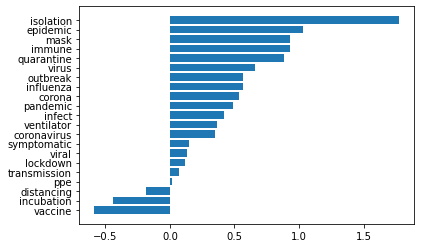

In [99]:
def f_importances(coef, names):
    coef_list = []
    name_list=[]
    for x in range(len(vectorizer.get_feature_names())):
        if  vectorizer.get_feature_names()[x] in names:
            print(vectorizer.get_feature_names()[x])
            coef_list.append(coef[x])
            name_list.append(vectorizer.get_feature_names()[x])
    imp = np.array(coef_list)
    imp,name_list = zip(*sorted(zip(imp,name_list)))
    plt.barh(range(len(name_list)), imp, align='center')
    plt.yticks(range(len(name_list)), name_list)
    plt.show()

features_names = ['corona', 
                  'virus', 
                  'viral', 
                  'covid', 
                  'influenza', 
                  'pandemic', 
                  'epidemic', 
                  'quarantine', 
                  'lockdown',
                  'distancing', 
                  'national emergency', 
                  'infect', 
                  'ventilator', 
                  'mask', 
                  'symptomatic', 
                  'immune', 
                  'incubation', 
                  'transmission', 
                  'vaccine',
                  'confirmed case',
                  'coronavirus',
                  'covid-19',
                  'outbreak',
                  'ppe',
                  'isolation',
                  'social distancing' ]
f_importances(classifier_linear.coef_.toarray()[0], features_names)

debt
economy
eviction
income
job
mortgage
rent
salary
wage


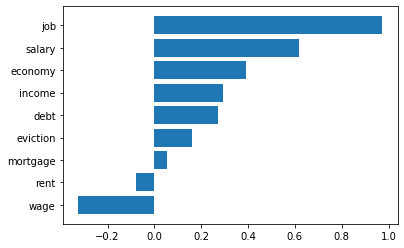

In [100]:
economy_features = ['Unemploy',
                    'rent',
                    'mortgage',
                         'economy',
                         'enough money',
                         'debt',
                         'salary', 
                          'wage', 
                          'income', 
                          'job', 
                          'eviction',
                         ]
f_importances(classifier_linear.coef_.toarray()[0], economy_features)

alone
avoid
lonely
rejected
trapped
ugly


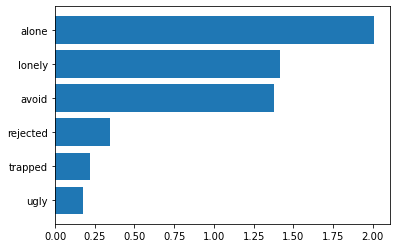

In [101]:
isolation_features = ['alone', 'lonely', 'no one cares', 'can’t see anyone', 'can’t see my', 'i miss my', 'i want to see my', 'trapped', 'i’m in a cage', 'feel ignored', 'ignoring me', 'ugly',
'rejected', 'avoid']
f_importances(classifier_linear.coef_.toarray()[0], isolation_features)

abuse
divorce
fight
fighting
yelling


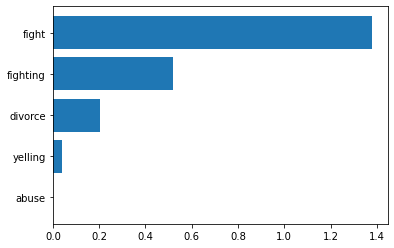

In [102]:
domestic_stress_features = ['divorce', 'domestic violence', 'abuse', 'yelling', 'fighting with me', 'we’re fighting', 'single mom',
'single dad', 'single parent', 'hit me', 'slapped me', 'fighting', 'fight']
f_importances(classifier_linear.coef_.toarray()[0], domestic_stress_features)

hopeless
suicide


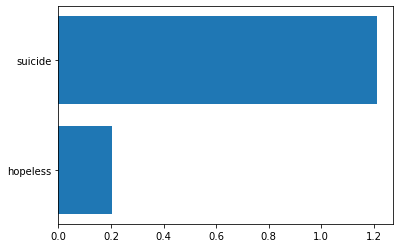

In [103]:
suicidality_features = ['commit suicide', 'jump off a bridge', 'i want to overdose', 'i’m a burden', 'i’m such a burden', 'i will overdose', 'thinking about overdose', 'kill myself', 'killing myself', 'hang myself', 
                        'hanging myself', 'cut myself', 'cutting myself', 'hurt myself', 'hurting myself', 'want to die', 'wanna die',
'don’t want to wake up', 'don’t wake up', 'never want to wake up', 'don’t want to be alive', 'want to be alive', 'wish it would all end', 'done with living', 'want it to end', 'it all ends tonight', 
                        'live anymore', 'living anymore', 'life anymore', 'be dead', 'take it anymore', 'end my life', 
                        'think about death', 'hopeless', 'hurt myself', 'no one will miss me', 'don’t want to wake up', 'if i live or die', 
                        'i hate my life', 'shoot me', 'kill me', 'suicide', 'no point']
f_importances(classifier_linear.coef_.toarray()[0], suicidality_features)

33211


C:\Users\wchen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


['00', '000', '000000001', '000002', '00005', '00015', '0002', '0003', '0005', '000s', '001', '0017', '0018', '002', '0026', '003', '004', '005', '006', '0065', '007', '008', '0081', '009', '00am', '01', '011', '012', '013', '014', '015', '016', '017', '018', '01am', '02', '020', '021', '022', '024', '025', '028', '03', '031', '0325', '035', '036', '037', '04', '043', '045', '047', '0470', '049', '05', '050', '053', '059', '06', '061', '063', '066', '07', '070', '077', '08', '084', '086', '087', '089', '09', '098', '0p', '10', '100', '1000', '1000000', '10000x', '1000l', '1000mg', '1000s', '1000th', '1000x', '1001', '100bpm', '100f', '100ish', '100k', '100km', '100lbs', '100m', '100mg', '100s', '100th', '100x', '101', '102', '103', '1038', '104', '104th', '105', '1051', '105751', '1066', '107', '1070', '109', '10am', '10days', '10h', '10ish', '10k', '10lbs', '10m', '10mg', '10min', '10mins', '10months', '10mph', '10pm', '10s', '10th', '10tv', '10weeks', '10x', '10x10', '10y', '10yo', '

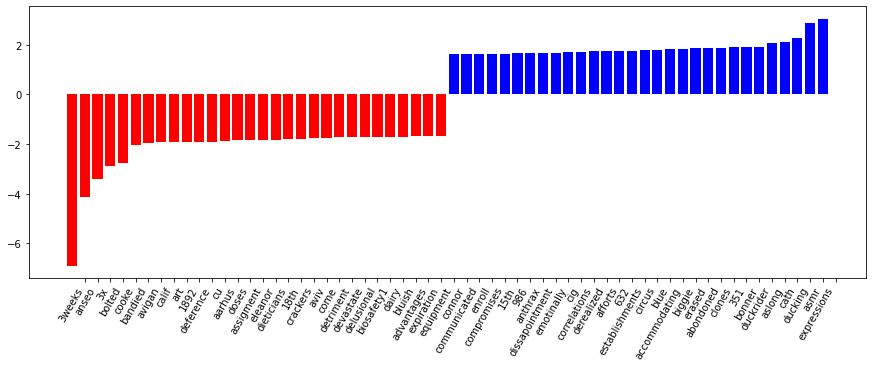

In [50]:
def plot_coefficients(classifier, feature_names, top_features=30):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    
cv = CountVectorizer(stop_words = 'english')
cv.fit(train_data.body.to_list())

svm = LinearSVC()
svm.fit(x_train, y_train)
print(cv.get_feature_names())
plot_coefficients(svm, cv.get_feature_names())